<a href="https://colab.research.google.com/github/kevmanning/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/DS_131_Simple_Linear_Regression_Assignment_Kevin_Manning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unit 1, Sprint 2, Module 1

###Learning Objectives:
- Student can create a scatterplot
- Student can identify the independent and dependent variables in a relationship (also known as features and target, and explanatory and response variables)
- Student can identify linear and nonlinear relationships from a scatterplot
- Student can calculate and interpret linear correlation
- Student can calculate and interpret the slope and intercept of a simple linear regression model
- Sudent can predict a response from a simple linear regression model
- Student can calculate and interpret a residual

#Use the following information to answer questions 1 - 13 in the assignment:



###Is head size related to brain weight in healthy adult humans?

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if there is a linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

In [84]:
#Import the Brainhead.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


The two variables we are interested in - for now - are 

- Brain, the brain weight in g
- Head, the head size in cubic cm

1) If we wish to predict brain weight from head size, which variable is the independent variable (also called the feature, explanatory or x variable) and which variable is the dependent variable (also called the target, response or y variable)?

Answer here: 

head size is the independent variable

brain weight is the dependent variable


2) Draw a scatterplot showing the relationship between brain weight and head size.  Make sure to graph the correct variable on the correct axis and label your graph.

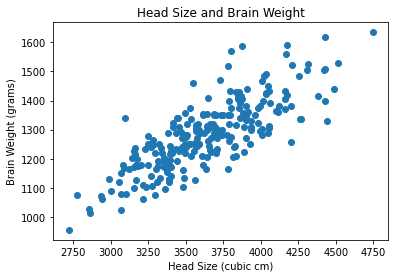

In [85]:
### YOUR CODE HERE ###

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.scatter(x= df['Head'], y= df['Brain'])

ax.set_title('Head Size and Brain Weight')
ax.set_xlabel('Head Size (cubic cm)')
ax.set_ylabel('Brain Weight (grams)')

plt.show()



3) Describe the strength and direction of the relationship between head size and brain weight.

Answer here: 

There is a strong, positive relationship between head size and brain weight. As head size increases, brain weight also increases at approximately the same interval as brain weight. Bigger head = bigger brain!

4) Determine if there is any missing data in the dataset.

In [86]:
### YOUR CODE HERE ###

df.shape

(237, 4)

In [87]:
df.isnull().sum()

Gender    0
Age       0
Head      0
Brain     0
dtype: int64

In [88]:
df2 = df.dropna()

In [89]:
df2.shape

(237, 4)

Answer here: There appear to be no missing values in the 237 observations of this data set.

5) Calculate and interpret the correlation coefficient for the relationship between head size and brain weight.  

In [90]:
### YOUR CODE HERE ###

import numpy as np

r = np.corrcoef(df2['Head'], df2['Brain'])
print(r)

[[1.         0.79956971]
 [0.79956971 1.        ]]


In [91]:
r2 = np.corrcoef(df2['Brain'], df2['Head'])
print(r2)

[[1.         0.79956971]
 [0.79956971 1.        ]]


Answer here: The correlation coefficient is .79957.

Since r ~= .80 and |r| > .8 represents a strong correlation, there is a fairly strong correlation between noggin size and brain size.

6) Without doing any other calculations, determine the correlation of brain weight with head size.

Answer here: 

the correlation between head size and brain weight is: +.79957

is that what we are going for, here?


7) Use Python to calculate the slope and intercept terms for the model of head size and brain weight.

In [106]:
### YOUR CODE HERE ###

# enter in (y ~ x)!!

from statsmodels.formula.api import ols

model = ols('Brain ~ Head', data= df2).fit()

model.params

Intercept    325.573421
Head           0.263429
dtype: float64

8) Use the model output above to write the linear model relating head size to brain weight (ie fill in the b terms with the correct numbers from above).

$$\hat{Y} = b_0 - b_1X$$



Answer here: 

$\hat{Y} = 325.573 + 0.263X$

9) What does the slope term tell us about the relationship between head size and brain weight?

Answer here: 

The **slope** tells us the expected change in y for a one-unit increase in X

In this case, we expect 0.263 grams of increase in brain weight for every cubic centimeter increase in head size

10) What does the intercept tell us about the relationship between head size and brain weight?

Answer here: 

The **intercept** tells us the expected value when X = 0

In this case, the head size in never = zero (in this dataset, or otherwize, I guess), so we do not interpret the intercept.

11) Draw a scatterplot with the regression line overlayed on top of the points.

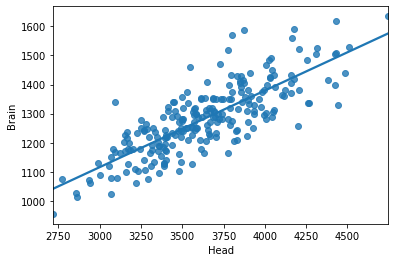

In [107]:
### YOUR CODE HERE ###

import seaborn as sns

ax = sns.regplot(x= 'Head', y= 'Brain', data= df2, ci= None)

12) A healty human has a brain size of 4100 cubic cm, how much do we expect his or her brain to weigh?

In [108]:
### YOUR CODE HERE ###

x = 4100

intercept= model.params[0]
slope= model.params[1]

predict = intercept + slope*x
print(round(predict, 3))

1405.634


Answer here

for a (deceased) 'healthy' human with a head size of 4,100 cubic cm, we expect them to have a brain weight of 1,405.63 grams.

13) Calculate and interpret the model residual for for the first observation in the dataset (head size = 4512 cubic cm).

In [95]:
df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [111]:
### YOUR CODE HERE ###

x= 4512
observed= 1530

intercept= model.params[0]
slope= model.params[1]

predict2 = intercept + slope*x
residual = observed - predict2

print('Residual: ', round(residual, 3))
print('Predicted:', round(predict2, 3))
print('Observed: ', round(observed, 3))

Residual:  15.833
Predicted: 1514.167
Observed:  1530


Answer here: The residual of the first observation (difference between the actual weight and the predicted weight is 15.833 grams. The model under-predicted the first observation by almost 16 grams.

#Use the following information to answer questions 14 - 16 in the assignment:



Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [167]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

sleep = pd.read_csv(data_url, skipinitialspace=True, header=0)

sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


14) Write a function that replaces the _ in each animal name with a space.  Eg. Asian_elephant = Asian elephant.  Hint: use the string.replace(old, new, count) function.

In [168]:
sleep.dtypes

Animal        object
Body         float64
Brain        float64
SWsleep      float64
Parasleep    float64
Totsleep     float64
Life         float64
Gest         float64
Pred           int64
Exposure       int64
Danger         int64
dtype: object

In [171]:
### YOUR CODE HERE ###

sleep['Animal'] = sleep['Animal'].str.replace('_', ' ')

sleep

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African giant pouched rat,1.000,6.60,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian elephant,2547.000,4603.00,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.50,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big brown bat,0.023,0.30,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian tapir,160.000,169.00,5.2,1.0,6.2,30.4,392.0,4,5,4
5,Cat,3.300,25.60,10.9,3.6,14.5,28.0,63.0,1,2,1
6,Chimpanzee,52.160,440.00,8.3,1.4,9.7,50.0,230.0,1,1,1
7,Chinchilla,0.425,6.40,11.0,1.5,12.5,7.0,112.0,5,4,4
8,Cow,465.000,423.00,3.2,0.7,3.9,30.0,281.0,5,5,5
9,Eastern American mole,0.075,1.20,6.3,2.1,8.4,3.5,42.0,1,1,1


15) Plot the relationship between life expectancy and total sleep and gestation time and total sleep.

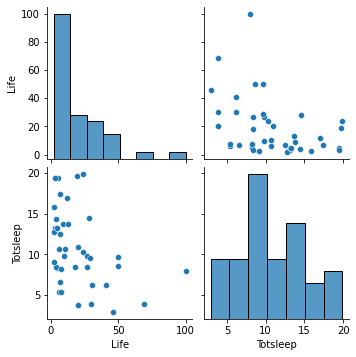

In [176]:
### YOUR CODE HERE ###

import seaborn as sns

to_plot = sleep[['Life', 'Totsleep']]

sns.pairplot(to_plot)

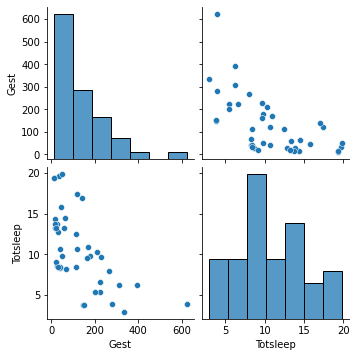

In [177]:
to_plot = sleep[['Gest', 'Totsleep']]

sns.pairplot(to_plot)

16) Calculate the correlation between life expectancy and total sleep and between gestation time and total sleep.

In [181]:
### YOUR CODE HERE ###

r3= np.corrcoef(sleep['Life'], sleep['Totsleep'])
print('Correlation between life expectancy and total sleep: ', r3[0,1])
r4= np.corrcoef(sleep['Gest'], sleep['Totsleep'])
print('Correlation between gestation time and total sleep: ', r4[0,1])

Correlation between life expectancy and total sleep:  -0.3824461769490717
Correlation between gestation time and total sleep:  -0.6144743061371066


#Portfolio Project Assignment.

We're coming into the home stretch!  Finalize your project results.  Ask any lingering questions, and complete any revisions you have.  This would be a good time to have a classmate take a look at your project and point out anything missing or any obvious errors (they happen to everyone!).